In [3]:
#     Data_Science_Capstone.ipynb
#     McKay Rytting
#     This notebook will be used for the Applied Data Science Capstone

### Install Additional Packages

In [1]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import geocoder

from numpy import dot

Solving environment: done

# All requested packages already installed.



### Import Illinois Zip Codes

In [4]:
zips_df=pd.read_csv('Illinois_Zip_Codes.csv')
chicago_zips_df=zips_df.drop(zips_df[zips_df['City']!='Chicago'].index)
zips_df.head()

,Zip Code,City,County
0,60001,Alden,Mchenry
1,60002,Antioch,Lake
2,60004,Arlington Heights,Cook
3,60005,Arlington Heights,Cook
4,60006,Arlington Heights,Cook


### Import home price data by zip code

In [5]:
homes_df=pd.read_csv('Sale_Prices_Zip.csv')
homes_df.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,935200.0,910000.0,961300.0,927500.0,974500.0,954100.0,987200.0,959000.0,1020200.0,1038500.0,1127500.0,1057400.0,986100.0,909100.0,918500.0,938200.0,928000.0,974800.0,939800,1053400,1047500,1030200,967500,1002000,1069100,1122400,1036400,958300,931500,928000,1069300,1043100.0,1217500.0,1024100.0,1029800.0,835100.0,961500.0,892000.0,869800.0,854700.0,870500.0,920100.0,1007900.0
1,84654,60657,Illinois,2,371300.0,392800.0,388000.0,381500.0,380600.0,378200.0,364400.0,362300.0,357200.0,364900.0,354700.0,385900.0,385900.0,383500.0,353400.0,358100.0,367200.0,383700.0,369300.0,350800.0,330400.0,346600.0,363300.0,386500.0,375200.0,376900.0,363300.0,370800.0,372800.0,375200.0,404300.0,400600.0,411500.0,386400.0,393400.0,383300.0,373700.0,368800.0,368200.0,375300.0,378300.0,389400.0,400400.0,393200.0,369500.0,359200.0,356800.0,359000.0,350700.0,360100.0,363200.0,364100.0,351300.0,346400.0,362700.0,362000.0,371500.0,341400.0,340400.0,357800.0,364400.0,363600.0,349100.0,357400.0,369500.0,365900.0,367700.0,355800.0,348200.0,364100.0,367800.0,375500.0,351500.0,365900.0,375400.0,403600.0,389100.0,375800.0,378100.0,395800.0,410300.0,393400.0,386200.0,388200.0,391100.0,385200.0,371700.0,368600.0,361600.0,353000.0,336200.0,330100.0,312800.0,323900.0,308200.0,315300.0,312700.0,323900.0,328100.0,323600.0,334900.0,346700.0,337400.0,325500.0,318100.0,313300.0,326200.0,317600.0,332600.0,331600.0,331200.0,315000.0,302500.0,305900.0,328800.0,358900.0,370100.0,369500.0,364200.0,366300.0,372900,333100,321900,316800,370500,395200,407400,405300,417500,419400,428500,425200,408300,381300.0,370900.0,397600.0,417700.0,424200.0,425500.0,411900.0,400600.0,390400.0,363300.0,384300.0,411500.0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147500.0,1135700.0,1166800.0,1336000.0,1306100.0,1273000.0,1220700.0,1274400.0,1181700.0,1152100.0,1082100.0,1141400.0,1136500.0,1166100.0,1193800.0,1183600.0,1246100.0,1296900.0,1174000.0,1198300,1166400,1168800,1110400,981500,1090700,1090700,1123200,104

In [6]:
# Remove non-Illinois zip codes, drop unnecessary columns
homes_df.drop(homes_df[homes_df['StateName']!='Illinois'].index,inplace=True)
homes_df.drop(['RegionID','StateName','SizeRank'],axis=1,inplace=True)

In [156]:
# Join with Illinois zip code list, remove non-Chicago zips, remove zips with no home price data
chicago_homes_df=zips_df.join(homes_df.set_index('RegionName'), on='Zip Code')
chicago_homes_df.drop(chicago_homes_df[chicago_homes_df['City']!='Chicago'].index,inplace=True)
chicago_homes_df.dropna(subset=['2020-03'], inplace=True)
chicago_homes_df

,Zip Code,City,County,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
341,60605,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365500.0,383300.0,374800.0,382600.0,408500.0,439600.0,419700.0,379600.0,344100.0,366300.0,360700.0,344000.0,326000.0,310500.0,298600.0,279800.0,262800.0,280200.0,290800.0,324400.0,310700.0,300300.0,289100.0,295000.0,300300.0,307500.0,297600.0,297500.0,297600.0,297600.0,309400.0,308200.0,320500.0,303500.0,302100.0,290300.0,289500.0,282300.0,285600.0,308200.0,321000.0,307400.0,299800.0,300700.0,326100.0,309100.0,298400.0,293200.0,330400.0,349600.0,386900.0,378500.0,374000.0,378500.0,415600.0,426100.0,422000.0,397900.0,383000.0,369800.0,380300.0,404700.0,383500.0,344900.0,314800.0,310400.0,340800.0,374700.0,412600.0
344,60608,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191100.0,204100.0,203900.0,206100.0,195300.0,190400.0,184400.0,172800.0,172200.0,169600.0,179200.0,189700.0,183200.0,167800.0,150500.0,142700.0,152800.0,163300.0,168900.0,176200.0,184600.0,192200.0,197700.0,192100.0,202200.0,202100.0,214300.0,206800.0,207200.0,202000.0,197200.0,203300.0,189600.0,205300.0,204200.0,231900.0,232100.0,237900.0,232900.0,235700.0,232600.0,256800.0,260400.0,257500.0,226100.0,215200.0,218200.0,237500.0,239900.0,239600.0,214200.0,213800.0,217100.0,216600.0,226800.0,225300.0,247900.0,250000.0,242900.0,240600.0,239000.0,255400.0,256800.0,261000.0,254200.0,257600.0,246800.0,257200.0,257400.0,261300.0,252600.0,242200.0,234700.0,225700.0,226200.0,231100.0,258600.0,270700.0,277500.0,263100.0,271400.0,269900.0,278100.0,279200.0,285800.0,288200.0,294200.0,300000.0,304100.0,272000.0,270700.0,270100.0,288100.0,288800.0,281400.0,283500.0,280000.0,289500.0,284200.0,291700.0,280200.0,272900.0,281500.0,287200.0,302600.0,310300.0
350,60614,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412000.0,395200.0,397800.0,388800.0,396500.0,407600.0,380700.0,377400.0,375200.0,376300.0,353200.0,371600.0,391800.0,438600.0,420700.0,380600.0,400000.0,429100.0,499300.0,508900.0,508200.0,520200.0,532500.0,533500.0,532000.0,495900.0,508000.0,488900.0,496400.0,469400.0,490000.0,482

In [8]:
# Left with 22 zip codes that have home price data
chicago_homes_df.shape

(22, 148)

### Gather business data

In [9]:
# define function to lookup latitude and longitude of postal codes
def latlonglookup(code):
     # initialize your variable to None
     lat_lng_coords = None
     # loop until you get the coordinates
     while(lat_lng_coords is None):
       g = geocoder.arcgis('{}, Chicago, IL'.format(code))
       lat_lng_coords = g.latlng
     latitude = lat_lng_coords[0]
     longitude = lat_lng_coords[1]
     return latitude,longitude

In [10]:
chicago_zips_df['Latitude'], chicago_zips_df['Longitude'] = zip(*chicago_zips_df['Zip Code'].apply(latlonglookup))

In [11]:
chicago_zips_df.head()

,Zip Code,City,County,Latitude,Longitude
337,60601,Chicago,Cook,41.886255,-87.622310
338,60602,Chicago,Cook,41.883250,-87.631495
339,60603,Chicago,Cook,41.880855,-87.623120
340,60604,Chicago,Cook,41.878160,-87.631010
341,60605,Chicago,Cook,41.869490,-87.625855


In [63]:
# Foursquare credentials
CLIENT_ID = 'WCA4FVDGHV2RYD2CC0JBDWFVNDQ2QV5BXAPD3QEL2SRE4T3N' # your Foursquare ID
CLIENT_SECRET = 'CCW0CKP02HOWDFW2MHYPVIZDZBBPF25YQSIIXBDHUTVKXQHY' # your Foursquare Secret
LIMIT=500

In [64]:
#Function to explore nearby venues
def getNearbyVenues(names, latitudes, longitudes, VERSION, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Zip Code', 
                  'Zip Code Latitude', 
                  'Zip Code Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
chicago_venues = getNearbyVenues(names=chicago_zips_df['Zip Code'],
                                 latitudes=chicago_zips_df['Latitude'],
                                 longitudes=chicago_zips_df['Longitude'],
                                 VERSION='20200101'
                                )

60601
60602
60603
60604
60605
60606
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60643
60644
60645
60646
60647
60649
60651
60652
60653
60654
60655
60656
60657
60659
60660
60661
60663
60664
60666
60668
60669
60670
60673
60674
60675
60677
60678
60679
60680
60681
60682
60684
60685
60686
60687
60688
60689
60690
60691
60693
60694
60695
60696
60697
60699
60701


In [15]:
chicago_venues.head()

,Zip Code,Zip Code Latitude,Zip Code Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,60601,41.886255,-87.62231,Chicago Architecture Center,41.887720,-87.623650,Tour Provider
1,60601,41.886255,-87.62231,Roti Modern Mediterranean,41.885900,-87.624945,Mediterranean Restaurant
2,60601,41.886255,-87.62231,Wildberry Pancakes & Cafe,41.884412,-87.623047,Breakfast Spot
3,60601,41.886255,-87.62231,St. Jane Chicago,41.886573,-87.624902,Hotel
4,60601,41.886255,-87.62231,Giordano's,41.885130,-87.623761,Pizza Place


In [16]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Zip Code'] = chicago_venues['Zip Code'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_grouped = chicago_onehot.groupby('Zip Code').mean().reset_index()
chicago_grouped.head()

,Zip Code,ATM,Adult Boutique,African Restaurant,Airport Service,Airport Terminal,American Restaurant,Amphitheater,Animal Shelter,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Chiropractor,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,Colombian Restaurant,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Currency Exchange,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health & Beauty Service,Health Food Store,Heliport,Historic Site,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Laundromat,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Nightlife Spot,Non-Profit,Office,Opera House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Rest Area,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Street Art,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Tour Provider,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,Travel Lounge,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Sh

### Compare all zips with Lincoln Park (Zip=60614)

In [17]:
# remove zip codes
chicago_grouped_data=chicago_grouped.drop(['Zip Code'],axis=1)

In [18]:
# compare neighborhoods to lincoln park
chicago_grouped_data['lp_similarity'] = chicago_grouped_data.dot(chicago_grouped_data.loc[13])

In [19]:
chicago_zips_df=chicago_zips_df.reset_index(drop=True)

In [20]:
chicago_zips_df['LPSim2020']=chicago_grouped_data['lp_similarity']

In [21]:
chicago_zips_df.head()

,Zip Code,City,County,Latitude,Longitude,LPSim2020
0,60601,Chicago,Cook,41.886255,-87.622310,0.007890
1,60602,Chicago,Cook,41.883250,-87.631495,0.005891
2,60603,Chicago,Cook,41.880855,-87.623120,0.007143
3,60604,Chicago,Cook,41.878160,-87.631010,0.011754
4,60605,Chicago,Cook,41.869490,-87.625855,0.010842


In [22]:
# Define function to perform comparison for list of versions
def compareToLincolnPark(names,latitudes,longitudes,VERSION):
    
    chicago_venues = getNearbyVenues(names,
                                 latitudes,
                                 longitudes,
                                 VERSION
                                )
    # one hot encoding
    chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

    # add neighborhood column back to dataframe
    chicago_onehot['Zip Code'] = chicago_venues['Zip Code'] 

    # move neighborhood column to the first column
    fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
    chicago_onehot = chicago_onehot[fixed_columns]

    chicago_grouped = chicago_onehot.groupby('Zip Code').mean().reset_index()
    
    # remove zip codes
    chicago_grouped_data=chicago_grouped.drop(['Zip Code'],axis=1)
    
    # compare neighborhoods to lincoln park
    chicago_grouped_data['lp_similarity'] = chicago_grouped_data.dot(chicago_grouped_data.loc[13])
    
    # create column name
    colname='LPSim'+VERSION
    chicago_zips_df[colname]=chicago_grouped_data['lp_similarity']

In [23]:
# Read in list of Foursquare API versions
versionsFS=pd.read_csv('versionsFS.csv')

In [24]:
versionsFS=versionsFS.applymap(str)

In [25]:
for versionDate in versionsFS['datecodes']:
    compareToLincolnPark(names=chicago_zips_df['Zip Code'],
                                latitudes=chicago_zips_df['Latitude'],
                                longitudes=chicago_zips_df['Longitude'],
                                VERSION=versionDate
                               )

60601
60602
60603
60604
60605
60606
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60643
60644
60645
60646
60647
60649
60651
60652
60653
60654
60655
60656
60657
60659
60660
60661
60663
60664
60666
60668
60669
60670
60673
60674
60675
60677
60678
60679
60680
60681
60682
60684
60685
60686
60687
60688
60689
60690
60691
60693
60694
60695
60696
60697
60699
60701
60601
60602
60603
60604
60605
60606
60607
60608
60609
60610
60611
60612
60613
60614
60615
60616
60617
60618
60619
60620
60621
60622
60623
60624
60625
60626
60628
60629
60630
60631
60632
60633
60634
60636
60637
60638
60639
60640
60641
60643
60644
60645
60646
60647
60649
60651
60652
60653
60654
60655
60656
60657
60659
60660
60661
60663
60664
60666
60668
60669
60670
60673
60674
60675
60677
60678
60679
60680
60681
60682
60684
60685
60686
60687
60688
60689
60690
60691
60693
60694
60695
6069

KeyError: 'groups'

In [37]:
chicago_zips_df.drop(['LPSim2020'],axis=1,inplace=True)

In [56]:
chicago_zips_similarities=chicago_zips_df.iloc[:,5:]
chicago_zips_df['aveSim']=chicago_zips_similarities.mean(axis=1)
chicago_zips_df['devSim']=chicago_zips_similarities.var(axis=1)
chicago_zips_df['maxSim']=chicago_zips_similarities.max(axis=1)
chicago_zips_df['minSim']=chicago_zips_similarities.min(axis=1)
chicago_zips_df['rangeSim']=chicago_zips_df['maxSim']-chicago_zips_df['minSim']

In [57]:
chicago_zips_df.head()

,Zip Code,City,County,Latitude,Longitude,LPSim20200101,LPSim20191201,LPSim20191101,LPSim20191001,LPSim20190901,LPSim20190801,LPSim20190701,LPSim20190601,LPSim20190501,LPSim20190401,LPSim20190301,LPSim20190201,LPSim20190101,LPSim20181201,LPSim20181101,LPSim20181001,LPSim20180901,LPSim20180801,LPSim20180701,LPSim20180601,LPSim20180501,LPSim20180401,LPSim20180301,LPSim20180201,LPSim20180101,LPSim20171201,LPSim20171101,LPSim20171001,LPSim20170901,LPSim20170801,LPSim20170701,LPSim20170601,LPSim20170501,LPSim20170401,LPSim20170301,LPSim20170201,LPSim20170101,LPSim20161201,LPSim20161101,LPSim20161001,LPSim20160901,LPSim20160801,LPSim20160701,LPSim20160601,LPSim20160501,LPSim20160401,LPSim20160301,LPSim20160201,LPSim20160101,LPSim20151201,LPSim20151101,aveSim,devSim,maxSim,minSim,rangeSim
0,60601,Chicago,Cook,41.886255,-87.622310,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,0.007890,1.227780e-35,0.007890,0.007890,0.0
1,60602,Chicago,Cook,41.883250,-87.631495,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,0.005891,7.673627e-37,0.005891,0.005891,0.0
2,60603,Chicago,Cook,41.880855,-87.623120,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,0.007143,3.760077e-35,0.007143,0.007143,0.0
3,60604,Chicago,Cook,41.878160,-87.631010,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,0.011754,1.227780e-35,0.011754,0.011754,0.0
4,60605,Chicago,Cook,41.869490,-87.625855,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,0.010842,4.911121e-35,0.010842,0.010842,0.0


In [58]:
chicago_zips_stats=chicago_zips_df[['Zip Code','aveSim','devSim','maxSim','minSim','rangeSim']]

In [59]:
chicago_zips_stats

,Zip Code,aveSim,devSim,maxSim,minSim,rangeSim
0,60601,0.007890,1.227780e-35,0.007890,0.007890,0.0
1,60602,0.005891,7.673627e-37,0.005891,0.005891,0.0
2,60603,0.007143,3.760077e-35,0.007143,0.007143,0.0
3,60604,0.011754,1.227780e-35,0.011754,0.011754,0.0
4,60605,0.010842,4.911121e-35,0.010842,0.010842,0.0
5,60606,0.008214,3.069451e-36,0.008214,0.008214,0.0
6,60607,0.008242,1.105002e-34,0.008242,0.008242,0.0
7,60608,0.012897,2.762506e-35,0.012897,0.012897,0.0
8,60609,0.017857,3.069451e-34,0.017857,0.017857,0.0
9,60610,0.013305,2.762506e-35,0.013305,0.013305,0.0


### Based on these results, it doesn't appear that these neighborhoods are changing appreciably over the timeframe studied, or at least that changes that are occurring are not captured in the foursquare data that is being accessed by the function. For each zip code, the max and min similarity to Lincoln Park are the same, so there is no change in similarity over the years studied.

### I still want to see which neighborhoods are changing the most over time in terms of home value, even though I don't have useful foursquare data to compare to the home value data

In [70]:
chicago_homes_df.head()

,Zip Code,City,County,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
341,60605,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365500.0,383300.0,374800.0,382600.0,408500.0,439600.0,419700.0,379600.0,344100.0,366300.0,360700.0,344000.0,326000.0,310500.0,298600.0,279800.0,262800.0,280200.0,290800.0,324400.0,310700.0,300300.0,289100.0,295000.0,300300.0,307500.0,297600.0,297500.0,297600.0,297600.0,309400.0,308200.0,320500.0,303500.0,302100.0,290300.0,289500.0,282300.0,285600.0,308200.0,321000.0,307400.0,299800.0,300700.0,326100.0,309100.0,298400.0,293200.0,330400.0,349600.0,386900.0,378500.0,374000.0,378500.0,415600.0,426100.0,422000.0,397900.0,383000.0,369800.0,380300.0,404700.0,383500.0,344900.0,314800.0,310400.0,340800.0,374700.0,412600.0
344,60608,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191100.0,204100.0,203900.0,206100.0,195300.0,190400.0,184400.0,172800.0,172200.0,169600.0,179200.0,189700.0,183200.0,167800.0,150500.0,142700.0,152800.0,163300.0,168900.0,176200.0,184600.0,192200.0,197700.0,192100.0,202200.0,202100.0,214300.0,206800.0,207200.0,202000.0,197200.0,203300.0,189600.0,205300.0,204200.0,231900.0,232100.0,237900.0,232900.0,235700.0,232600.0,256800.0,260400.0,257500.0,226100.0,215200.0,218200.0,237500.0,239900.0,239600.0,214200.0,213800.0,217100.0,216600.0,226800.0,225300.0,247900.0,250000.0,242900.0,240600.0,239000.0,255400.0,256800.0,261000.0,254200.0,257600.0,246800.0,257200.0,257400.0,261300.0,252600.0,242200.0,234700.0,225700.0,226200.0,231100.0,258600.0,270700.0,277500.0,263100.0,271400.0,269900.0,278100.0,279200.0,285800.0,288200.0,294200.0,300000.0,304100.0,272000.0,270700.0,270100.0,288100.0,288800.0,281400.0,283500.0,280000.0,289500.0,284200.0,291700.0,280200.0,272900.0,281500.0,287200.0,302600.0,310300.0
350,60614,Chicago,Cook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412000.0,395200.0,397800.0,388800.0,396500.0,407600.0,380700.0,377400.0,375200.0,376300.0,353200.0,371600.0,391800.0,438600.0,420700.0,380600.0,400000.0,429100.0,499300.0,508900.0,508200.0,520200.0,532500.0,533500.0,532000.0,495900.0,508000.0,488900.0,496400.0,469400.0,490000.0,482

In [78]:
import matplotlib.pyplot as plt

In [117]:
chicago_homes_plot=chicago_homes_df.T
chicago_homes_plot.head()

,341,344,350,352,353,354,358,361,365,366,367,369,372,373,374,375,379,383,384,386,388,391
Zip Code,60605,60608,60614,60616,60617,60618,60622,60625,60630,60631,60632,60634,60638,60639,60640,60641,60646,60652,60653,60655,60657,60661
City,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago,Chicago
County,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook,Cook
2008-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289100,279200,NaN,NaN,248300,NaN,NaN,NaN,NaN,NaN,NaN,246400,371300,NaN
2008-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280400,262300,NaN,NaN,241100,NaN,NaN,NaN,NaN,NaN,NaN,245500,392800,NaN


In [118]:
chicago_homes_plot.columns=chicago_homes_plot.iloc[0]
chicago_homes_plot.drop(chicago_homes_plot.index[0:3], inplace=True)
chicago_homes_plot.fillna(0, inplace=True)
chicago_homes_plot.head()

Zip Code,60605,60608,60614,60616,60617,60618,60622,60625,60630,60631,60632,60634,60638,60639,60640,60641,60646,60652,60653,60655,60657,60661
2008-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,289100.0,279200.0,0.0,0.0,248300.0,0.0,0.0,0.0,0.0,0.0,0.0,246400.0,371300.0,0.0
2008-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,280400.0,262300.0,0.0,0.0,241100.0,0.0,0.0,0.0,0.0,0.0,0.0,245500.0,392800.0,0.0
2008-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,274300.0,280500.0,0.0,0.0,216800.0,0.0,0.0,0.0,0.0,0.0,0.0,244900.0,388000.0,0.0
2008-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,281500.0,300200.0,0.0,0.0,217700.0,0.0,0.0,0.0,0.0,0.0,0.0,232400.0,381500.0,0.0
2008-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282600.0,291800.0,0.0,0.0,211300.0,0.0,0.0,0.0,0.0,0.0,0.0,234200.0,380600.0,0.0


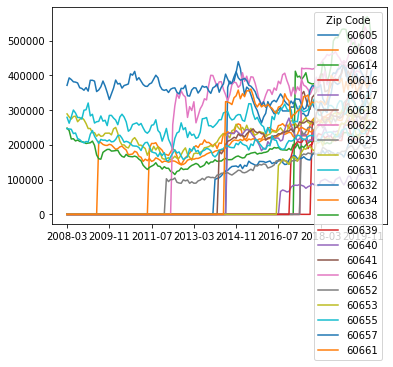

In [119]:
chicago_homes_plot.plot()
plt.show()

### Probably more lines than are really useful here. Going to just look at prices that have risen the most. Additionally, only using data after 2011 due to the drop in prices following 2008.

In [157]:
# Remove data before 2011
chicago_homes_st=chicago_homes_df.iloc[:,37:]
#chicago_homes_st.fillna(0, inplace=True)
chicago_homes_st.head()

,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365500.0,383300.0,374800.0,382600.0,408500.0,439600.0,419700.0,379600.0,344100.0,366300.0,360700.0,344000.0,326000.0,310500.0,298600.0,279800.0,262800.0,280200.0,290800.0,324400.0,310700.0,300300.0,289100.0,295000.0,300300.0,307500.0,297600.0,297500.0,297600.0,297600.0,309400.0,308200.0,320500.0,303500.0,302100.0,290300.0,289500.0,282300.0,285600.0,308200.0,321000.0,307400.0,299800.0,300700.0,326100.0,309100.0,298400.0,293200.0,330400.0,349600.0,386900.0,378500.0,374000.0,378500.0,415600.0,426100.0,422000.0,397900.0,383000.0,369800.0,380300.0,404700.0,383500.0,344900.0,314800.0,310400.0,340800.0,374700.0,412600.0
344,NaN,NaN,NaN,NaN,NaN,191100.0,204100.0,203900.0,206100.0,195300.0,190400.0,184400.0,172800.0,172200.0,169600.0,179200.0,189700.0,183200.0,167800.0,150500.0,142700.0,152800.0,163300.0,168900.0,176200.0,184600.0,192200.0,197700.0,192100.0,202200.0,202100.0,214300.0,206800.0,207200.0,202000.0,197200.0,203300.0,189600.0,205300.0,204200.0,231900.0,232100.0,237900.0,232900.0,235700.0,232600.0,256800.0,260400.0,257500.0,226100.0,215200.0,218200.0,237500.0,239900.0,239600.0,214200.0,213800.0,217100.0,216600.0,226800.0,225300.0,247900.0,250000.0,242900.0,240600.0,239000.0,255400.0,256800.0,261000.0,254200.0,257600.0,246800.0,257200.0,257400.0,261300.0,252600.0,242200.0,234700.0,225700.0,226200.0,231100.0,258600.0,270700.0,277500.0,263100.0,271400.0,269900.0,278100.0,279200.0,285800.0,288200.0,294200.0,300000.0,304100.0,272000.0,270700.0,270100.0,288100.0,288800.0,281400.0,283500.0,280000.0,289500.0,284200.0,291700.0,280200.0,272900.0,281500.0,287200.0,302600.0,310300.0
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,412000.0,395200.0,397800.0,388800.0,396500.0,407600.0,380700.0,377400.0,375200.0,376300.0,353200.0,371600.0,391800.0,438600.0,420700.0,380600.0,400000.0,429100.0,499300.0,508900.0,508200.0,520200.0,532500.0,533500.0,532000.0,495900.0,508000.0,488900.0,496400.0,469400.0,490000.0,482500.0,536000.0,562900.0,568900.0,556400.0,509800.0
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259700.0,265300.0,264300.0,269700.0,264400.0,280200.0,279600.0,277900.0,277700.0,292700.0,299700.0,299900.0,293000.0,290200.0,292000.0,295900.0,324100.0,337100.0,351600.0,337200.0,319900.0,306000.0,298300.0,306500.0,310300.0,333800.0,336400.0,336500.0,347200.0
353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [166]:
chicago_homes_stats=chicago_homes_df.iloc[:,0:1]

In [181]:
chicago_homes_stats['avePrice']=chicago_homes_st.mean(axis=1)
chicago_homes_stats['devPrice']=chicago_homes_st.var(axis=1)
chicago_homes_stats['maxPrice']=chicago_homes_st.max(axis=1)
chicago_homes_stats['minPrice']=chicago_homes_st.min(axis=1)
chicago_homes_stats['rangePrice']=chicago_homes_stats['maxPrice']-chicago_homes_stats['minPrice']
chicago_homes_stats['normRangePrice']=chicago_homes_stats['rangePrice']/chicago_homes_stats['minPrice']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [182]:
chicago_homes_stats.sort_values(by=['normRangePrice'])

,Zip Code,avePrice,devPrice,maxPrice,minPrice,rangePrice,normRangePrice
358,60622,459708.823529,1.209898e+09,539700.0,417900.0,121800.0,0.291457
352,60616,301624.137931,7.463969e+08,351600.0,259700.0,91900.0,0.353870
388,60657,364377.477477,9.560894e+08,428500.0,302500.0,126000.0,0.416529
361,60625,279041.176471,9.531110e+08,328400.0,228700.0,99700.0,0.435942
391,60661,338342.857143,9.517277e+08,400000.0,275200.0,124800.0,0.453488
354,60618,380579.411765,1.227633e+09,445400.0,302600.0,142800.0,0.471910
350,60614,456562.162162,4.410927e+09,568900.0,353200.0,215700.0,0.610702
373,60639,221156.410256,4.185678e+08,271700.0,165800.0,105900.0,0.638721
374,60640,234797.101449,6.229147e+08,302000.0,183100.0,118900.0,0.649372
341,60605,337236.231884,2.050373e+09,439600.0,262800.0,176800.0,0.672755


### The zip codes with the largest proportional increases in property value over the given timeframe are: 60653 (Grand Boulevard/Bronzeville), 60652 (Ashburn), 60632 (Archer Heights), 60608 (Lower West Side), 60638 (Bedford Park), 60617 (South Chicago), and 60630 (Jefferson Park), which all at least double in average home sale price over the given timeframe.

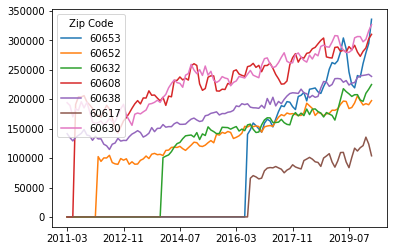

In [194]:
chicago_homes_plot[[60653,60652,60632,60608,60638,60617,60630]].plot()
plt.show()

In [196]:
chicago_homes_stats.sort_values(by=['rangePrice'])

,Zip Code,avePrice,devPrice,maxPrice,minPrice,rangePrice,normRangePrice
353,60617,92425.000000,2.717070e+08,135600.0,64600.0,71000.0,1.099071
352,60616,301624.137931,7.463969e+08,351600.0,259700.0,91900.0,0.353870
361,60625,279041.176471,9.531110e+08,328400.0,228700.0,99700.0,0.435942
373,60639,221156.410256,4.185678e+08,271700.0,165800.0,105900.0,0.638721
386,60655,202976.576577,6.120385e+08,260400.0,153400.0,107000.0,0.697523
383,60652,142874.489796,1.215463e+09,205800.0,89400.0,116400.0,1.302013
374,60640,234797.101449,6.229147e+08,302000.0,183100.0,118900.0,0.649372
358,60622,459708.823529,1.209898e+09,539700.0,417900.0,121800.0,0.291457
367,60632,161856.000000,7.796436e+08,225000.0,100800.0,124200.0,1.232143
391,60661,338342.857143,9.517277e+08,400000.0,275200.0,124800.0,0.453488


### The neighborhood with the biggest raw increases were 60614 (Lincoln Park), 60653 (Grand Boulevard/Bronzeville), 60605 (Loop), 60646 (Forest Glen), and 60630 (Jefferson Park)

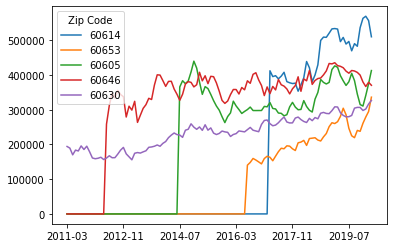

In [197]:
chicago_homes_plot[[60614,60653,60605,60646,60630]].plot()
plt.show()